# Contents

### Import Librabries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

### Import widget

In [2]:
# Use ipywidgets to create the drop downs
import ipywidgets as widgets

## About
    * This contains visualizations after cleaning the messy data from the initial dataset.
    * Using Ipywidgets to create dropdowns for faster explorations and visualizations.

## Read dataset

In [3]:
# set the display option to show all columns
pd.set_option('display.max_columns', None)

In [4]:
# read cleaned data

df= pd.read_csv('Cleaned FIFA 2021 data.csv')
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Positions,Height (cm),Weight (kg),Preferred Foot,BOV,Best Position,Joined,Value (€),Wage (€),Release Clause (€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Name in Long Name,BestPosition in Position,Contract Start,Contract End,Contract Type,Playing Years
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",170,72,Left,93,RW,2004-07-01,103500000,560000,138400000,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,True,True,2004,2021,On Contract,19
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,"ST, LW",187,83,Right,92,ST,2018-07-10,63000000,220000,75900000,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,True,True,2018,2022,On Contract,5
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,GK,188,87,Right,91,GK,2014-07-16,120000000,125000,159400000,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,True,True,2014,2023,On Contract,9
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,"CAM, CM",181,70,Right,91,CAM,2015-08-30,129000000,370000,161000000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,True,True,2015,2023,On Contract,8
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,"LW, CAM",175,68,Right,91,LW,2017-08-03,132000000,270000,166500000,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,True,True,2017,2022,On Contract,6


# Visuals

### 1. Contract Types

Text(0, 0.5, 'Total')

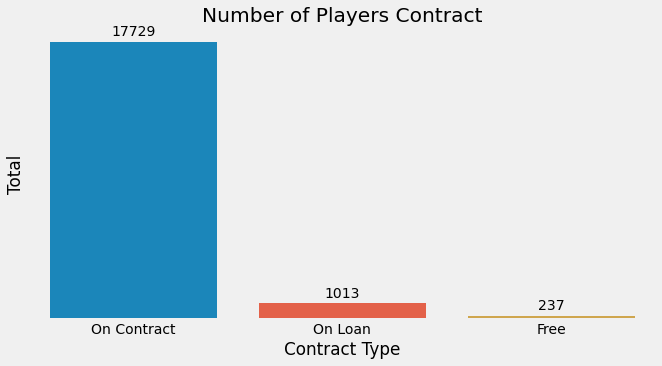

In [5]:
# count type of contracts and visualize

plt.figure(figsize=(10,5))

# create the countplot
ax = sns.countplot(x = df['Contract Type'] )

# add count numbers on top of bars
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')

# remove y ticks
ax.yaxis.set_ticks([])

# add title and ylabel
plt.title('Number of Players Contract')
plt.ylabel('Total')


### 1.1 The Number of players in each Age Range 

<AxesSubplot:title={'center':'The age bracket with more players'}, xlabel='Age', ylabel='count'>

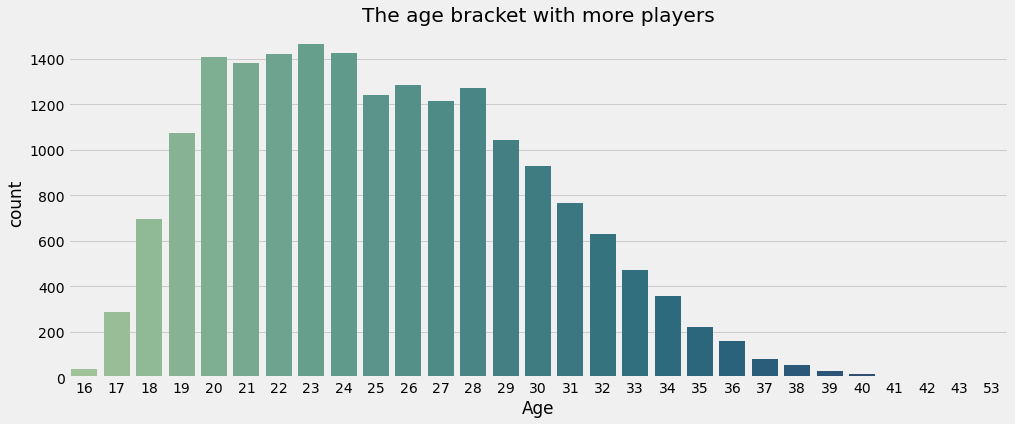

In [6]:
plt.figure(figsize = (15,6))
plt.title('The age bracket with more players')
sns.countplot(x = 'Age', data = df, palette = 'crest')

* A huge number of players are within the Ages of 19 - 31

### 2. Dashboard 1 - View Clubs and different Nationality with Player Name - Age, Hits 

In [7]:
# Pick needed columns

clubs = df[['Name', 'Nationality', 'Age', 'Club', 'Preferred Foot', 'Best Position', 'Hits' ]]

In [8]:
# create pivot table to view how to plot graph

pivot = pd.pivot_table(clubs, values=['Age', 'Hits'], index=['Club', 'Nationality', 'Name'])
pivot[:7]

Age  Hits
Club                  Nationality        Name                       
1. FC Heidenheim 1846 Austria            K. Kerschbaumer  28.0   7.0
                      Bosnia Herzegovina M. Ramusović     19.0   3.0
                      Germany            A. Geipl         28.0   3.0
                                         C. Kühlwetter    24.0   6.0
                                         D. Burnić        22.0  41.0
                                         D. Otto          21.0  16.0
                                         D. Ramaj         18.0   6.0

#### 2.1 Interactive Graph that changes when the appropriate items are selected

In [9]:
### create a function to get unique values from columnns, sort them and pass to a list ###

# creates variable called 'All'
All = 'All'

# create the function
def unique_sorted(array):
    """sorts, gets unique values and pass to list"""
    unique = array.sort_values().unique().tolist() # sorts, gets unique values and pass to list
    unique.insert(0, All) # inserts sorted unique list to All variable
    return unique # return the unique values

In [10]:
### create a function using ipywidgets dropdowns to plot bar graphs depending on the selected item ###

output = widgets.Output() # ouput of the widgets to be displayed 
plot_output = widgets.Output() # ouput of the selected graph to be displayed

#-------------------------------create variables to be passed into dropdown widgets----------------------------#
 
club_select = widgets.Dropdown(options=unique_sorted(clubs['Club']), description = 'Club')  # uses uniques_sorted funct. to get unique clubs
nat_select = widgets.Dropdown(options=unique_sorted(clubs['Nationality']), description = 'Nationality') # uses uniques_sorted funct. to get unique Nat.
plot_select =  widgets.Dropdown(options=['Age', 'Hits'], description='Plot') # passes the columns to plot as options


#--------------------create function to get unique nationalities when a club is selected----------------------#

def get_nationalities_in_club(club):
    
    if club == 'All':
        # if club == All, return all unique Nationalities
        return unique_sorted(clubs['Nationality']) 
    else:          
        # elif a unique club is selected, return unique Nationalities for club
        return unique_sorted(clubs[clubs['Club'] == club]['Nationality']) 
        
        
#----------------create function to get dropdown values and filter outputs as values are changed--------------#        
        
def club_nat_filter(club, nationality, plot):
    output.clear_output() # clears the ouput of the selected items when a new one is selected
    plot_output.clear_output() # clears the ouput of the selected graph when a new plot is selected
    
    if club == 'All':
        club_nat = clubs
        nat_options = get_nationalities_in_club('All')  # if club_nat = clubs, return all unique Nationalities
    else:
        club_nat = clubs[clubs['Club'] == club]  # elif a unique club is selected, return unique club
        nat_options = get_nationalities_in_club(club)  # nat_options updates to unique Nationalities for club
    
    nat_select.options = nat_options # then passes nat_options as options for nat_select variable
    
    if nationality == 'All':
        pass # do nothing
    else:
        club_nat = clubs[(clubs['Club'] == club) & (clubs['Nationality'] == nationality)] # else All Clubs & Nationality
        
    with output:
        display(club_nat) # displays Output
        
    with plot_output:
        plt.figure(figsize=(10,7)) # set figure size for graph
        
        if (plot == 'Age') & (club != 'All'):
            sorted_data = club_nat.sort_values(by='Age', ascending = False)
            sns.barplot(x = sorted_data['Age'], y = sorted_data['Name'], palette = 'crest_r') # plots bar graph if plot is set to Age 
            plt.title('Player Age') # add title
            print('This is For', club, 'Club')
            plt.show() # display plot
        elif (plot == 'Hits') & (club != 'All'):
            sorted_data = club_nat.sort_values(by='Hits', ascending = False)
            sns.barplot(x = sorted_data['Hits'], y = sorted_data['Name'], palette = 'crest_r') # plots bar graph if plot is set to Hits
            plt.title('Number of Hits') # add title
            print('This is For', club, 'Club')
            plt.show() # display plot

#--------------------create functions to observe when a change is made for each dropdown---------------------#

def club_change(change): # observes when club is changed and selects values for (Nationality & Plot) for that club
    club_nat_filter(change.new, 'All', plot_select.value)
    
def nat_change(change): # observes when Nationality is changed and selects values for (club & Plot) for that Nationality
    club_nat_filter(club_select.value, change.new, plot_select.value)

def plot_change(change): # observes when plot is changed and selects values for (club & Nationality) for both columns
    club_nat_filter(club_select.value, nat_select.value, change.new)    

#---------------------- observes the function and selects appropriate values------------------#

club_select.observe(club_change, names='value') 
nat_select.observe(nat_change, names='value')
plot_select.observe(plot_change, names='value')

nat_select.disabled = True # disables nat_select on default

def enable_nat_select(change):
    if change.new == 'All':
        nat_select.disabled = True # disables nat_select if club is All
    else:
        nat_select.disabled = False # enables nat_select when unique club is selected
    
club_select.observe(enable_nat_select, names='value') # observes enable_nat_select for changes


#----------------------arranges dropdowns in horizontal form--------------#

input_widgets = widgets.HBox([club_select, nat_select, plot_select])


#### About Data Exploration & Visuals:
    * With this you can select any club you want.
    * With the club selected, you can sort by the Nationalities unique to players in that club.
    * You can see the visualization of the Player Ages or Number of Player Hits and compare them.

#### Notes For Dashboard 1 Use
    * Nationality dropdown comes on if Contract Type is not All - Used to sort Club Players Contract Type by Nationality.
    * Plot has Hits and Age graphs which shows us a bar chart comparing player Ages or Hits. Which can also be further       filtered using unique nationality.

#### Display Values & Graph - Dashboard 1

In [11]:
# display dropdowns and plot graph

tab = widgets.Tab([output, plot_output]) # create two tabs for exploration and chart
tab.set_title(0, 'Dataset Exploration')
tab.set_title(1, 'Bar Plot')

dashboard = widgets.VBox([input_widgets, tab]) # creates dashboard with dropdown inputs and tabs
display(dashboard)

#item_layout = widgets.Layout(margin='0 0 50px 0')

### 3. Dashboard 2 - View Players wage, value and release clause

In [12]:
# Pick needed columns

player_worth = df[['Name', 'Club','Nationality', 'Value (€)', 'Wage (€)', 'Release Clause (€)']]

In [13]:
# create pivot table to view how to plot graphs

pivot2 = pd.pivot_table(player_worth, values=['Value (€)', 'Wage (€)', 'Release Clause (€)'], index=['Club', 'Name'] )
pivot2[:7]

Release Clause (€)  Value (€)  Wage (€)
Club                  Name                                                  
1. FC Heidenheim 1846 A. Geipl                  1300000    1100000      9000
                      C. Kühlwetter             1500000    1300000      7000
                      D. Burnić                 2200000    2300000      7000
                      D. Otto                         0    2300000      9000
                      D. Ramaj                   612000     500000       500
                      D. Thomalla               1300000    1100000      9000
                      F. Pick                   3900000    2200000     12000

#### 3.1  Interactive Graph that changes when the appropriate items are selected

In [14]:
### create a function using ipywidgets dropdowns to plot bar graphs depending on the selected item ###

worth = 'worth'

output_worth = widgets.Output() # ouput of the widgets to be displayed 
worth_plot = widgets.Output() # ouput of the selected graph to be displayed

#-------------------------------create variables to be passed into dropdown widgets----------------------------#

select_club = widgets.Dropdown(options=unique_sorted(player_worth['Club']), description = 'Club')  # uses uniques_sorted funct. to get unique clubs
select_nat = widgets.Dropdown(options=unique_sorted(player_worth['Nationality']), description = 'Nationality') # uses uniques_sorted funct. to get unique Nat.
select_plot = widgets.Dropdown(options=['Release Clause (€)','Value (€)', 'Wage (€)', worth], description='Plot') # passes the columns to plot as options

#-------------------- bound 1 & 2 are used to filter manually wage intervals------------------#
bound1 = widgets.BoundedIntText(min = 0, max = 600000, step = 500, description = 'Wage (€) Start:', value = 0)
bound2 = widgets.BoundedIntText(min = 0, max = 600000, step = 5000, description = 'Wage (€) End:', value = 600000)
 
#--------------------create function to get unique nationalities when a club is selected----------------------#

def get_nationalities_in_player_worth(club):
    
    if club == 'All':
        # if club == All, return all unique Nationalities
        return unique_sorted(player_worth['Nationality']) 
    else:          
        # elif a unique club is selected, return unique Nationalities for club
        return unique_sorted(player_worth[player_worth['Club'] == club]['Nationality']) 
        
#----------------create function to get dropdown values and filter outputs as values are changed--------------#        
        
def worth_filtering(club, nationality, plot, value, boundary):
    output_worth.clear_output() # clears the ouput of the selected items when a new one is selected
    worth_plot.clear_output() # clears the ouput of the selected graph when a new plot is selected
    
    if club == 'All':
        worth_filter = player_worth
        nat_options = get_nationalities_in_player_worth('All')  # if club = All, return all unique Nationalities
    else:
        worth_filter = player_worth[player_worth['Club'] == club]  # elif a unique club is selected, return unique club
        nat_options = get_nationalities_in_player_worth(club)  # nat_options updates to unique Nationalities for club
    
    select_nat.options = nat_options # then passes nat_options as options for select_nat variable
    
    if nationality == 'All':
        pass # do nothing
    else:
        worth_filter = player_worth[(player_worth['Club'] == club) & (player_worth['Nationality'] == nationality)] # else All Clubs & Nationality
    
    if (club == 'All') & (value <= boundary): # filters output manually if club == All
        worth_filter = worth_filter[(worth_filter['Wage (€)'] >= value) & (worth_filter['Wage (€)'] <= boundary)].sort_values(by='Wage (€)',ascending = False)
        
    elif value <= boundary: # used for initial and end manual wage filtering for bound 1 and 2 values
        worth_filter = worth_filter[(worth_filter['Wage (€)'] >= value) & (worth_filter['Wage (€)'] <= boundary)].sort_values(by='Wage (€)',ascending = False)
          
    with output_worth:
        display(worth_filter) # displays Output
        
    with worth_plot:
        plt.figure(figsize=(10,7)) # set figure size for graph
        
        if plot == 'Release Clause (€)':
            sorted_data = worth_filter.sort_values(by='Release Clause (€)', ascending = False)
            sns.barplot(x = sorted_data['Release Clause (€)'], y = sorted_data['Name'], palette = 'crest_r')
            plt.title('Player Release Clause') # add title
            print('This is For', club, 'Club')
            plt.show() # display plot
        elif plot == 'Value (€)':
            sorted_data = worth_filter.sort_values(by='Value (€)', ascending = False)
            sns.barplot(x = sorted_data['Value (€)'], y = sorted_data['Name'], palette = 'crest_r')
            plt.title('Player Value') # add title
            print('This is For', club, 'Club')
            plt.show() # display plot
        elif plot == 'Wage (€)':
            sns.barplot(x = worth_filter['Wage (€)'], y = worth_filter['Name'], palette = 'crest_r')
            plt.title('Player Wage') # add title
            print('This is For', club, 'Club')
            plt.show() # display plot
        elif plot == worth:
            sns.scatterplot(x = worth_filter['Wage (€)'], y = worth_filter['Value (€)'], palette = 'crest_r')
            plt.title('Scatterplot Comparing Player Value with Wages') # add title
            print('This is For', club, 'Club')
            plt.show() # display plot

            
#--------------------create functions to observe when a change is made for each dropdown---------------------#

def change_club(change): # observes when club is changed and selects values for (Nationality & Plot) for that club
    worth_filtering(change.new, select_nat.value, select_plot.value, bound1.value, bound2.value)
    
def change_nat(change): # observes when Nationality is changed and selects values for (club & Plot) for that Nationality
    worth_filtering(select_club.value, change.new, select_plot.value, bound1.value, bound2.value)
    
def change_plot(change): # observes when plot is changed and selects values for (club & Nationality) for both columns
    worth_filtering(select_club.value, select_nat.value, change.new, bound1.value, bound2.value)

def change_bound1(change): # observes when other dropdowns are changed and also offers manual filtering of wage start column
    worth_filtering(select_club.value, select_nat.value, select_plot.value, change.new, bound2.value)
    
def change_bound2(change): # observes when other dropdowns are changed and also offers manual filtering of wage end column
    worth_filtering(select_club.value, select_nat.value, select_plot.value, bound1.value, change.new)

    
#---------------------- observes the function and selects appropriate values------------------#

select_club.observe(change_club, names = 'value')
select_nat.observe(change_nat, names = 'value')
select_plot.observe(change_plot, names = 'value')
bound1.observe(change_bound1, names='value')
bound2.observe(change_bound2, names = 'value')

select_nat.disabled = True # disables select_nat on default

def enable_select_nat(change):
    if change.new == 'All':
        select_nat.disabled = True # disables select_nat if club is All
    else:
        select_nat.disabled = False # enables select_nat when unique club is selected
    
select_club.observe(enable_select_nat, names='value') # observes enable_select_nat for changes

#----------------------arranges dropdowns in horizontal form--------------#

input_widget = widgets.HBox([select_club, select_nat, select_plot])
input_widget2 = widgets.VBox([bound1, bound2])


#### About Data Exploration & Visuals:
    * With this you can select any club you want.
    * With the club selected, you can sort by the Nationalities unique to players in that club.
    * You can see the visualization of the Players Release clause, value and wages and compare them within that club.
    * You can select a range of wages you want to see for that club or all clubs.

#### Notes For Dashboard 2 Use
    * Nationality dropdown comes on if Contract Type is not All - Used to sort Club Players Contract Type by Nationality.
    * Wage Start and end is used to filter ouput based on range of wages put.
    * Different plot outputs are available, Release clause, value and wage which shows respective values based on club      selected.
    * Worth plot shows a scatterplot between Value and Wage which shows us the range between valueable players and how much their paid.

#### Display Values & Graph - Dashboard 2

In [15]:
# display dropdowns and plot graph

tab2 = widgets.Tab([output_worth, worth_plot]) # create two tabs for exploration and chart
tab2.set_title(0, 'Dataset Exploration')
tab2.set_title(1, 'Plots')

dashboard2 = widgets.VBox([input_widget, input_widget2, tab2]) # creates dashboard with dropdown inputs and tabs
display(dashboard2)

#item_layout = widgets.Layout(margin='0 0 50px 0')

* To Do -
  Write a sort condtion under output to sort the output for when plot is == wage or value or .. in ascending = False

### 4. Dashboard 3 - View Contract Start, End, Type and Playing Years

In [16]:
# pick needed columns

contract = df[['Name', 'Club', 'Nationality', 'Joined', 'Contract Start', 'Contract End',
               'Contract Type', 'Playing Years'  ]]

In [17]:
# convert date column to datetime

contract['Joined'] = pd.to_datetime(contract['Joined'])

In [18]:
# create pivot table to get idea how to plot graph

pivot3 = pd.pivot_table(contract, values=['Joined','Playing Years'], index=['Club', 'Nationality', 'Name'])
pivot3[:7]

Playing Years
Club                  Nationality        Name                          
1. FC Heidenheim 1846 Austria            K. Kerschbaumer            4.0
                      Bosnia Herzegovina M. Ramusović               3.0
                      Germany            A. Geipl                   3.0
                                         C. Kühlwetter              3.0
                                         D. Burnić                  3.0
                                         D. Otto                    5.0
                                         D. Ramaj                   4.0

#### 4.1 Interactive Graph that changes when the appropriate items are selected

In [19]:
# Main
### create a function using ipywidgets dropdowns to plot bar graphs depending on the selected item ###

count = 'count' # variable for plotting
contract_output = widgets.Output() # ouput of the widgets to be displayed 
contract_plot = widgets.Output() # ouput of the selected graph to be displayed

#-------------------------------create variables to be passed into dropdown widgets----------------------------#

sel_club = widgets.Dropdown(options=unique_sorted(contract['Club']), description = 'Club')  # uses uniques_sorted funct. to get unique clubs
sel_nat = widgets.Dropdown(options=unique_sorted(contract['Nationality']), description = 'Nationality') # uses uniques_sorted funct. to get unique Nat.
sel_con_type = widgets.Dropdown(options=unique_sorted(contract['Contract Type']), description = 'Contract Type')  # uses uniques_sorted funct. to get unique contract type
term_played = widgets.IntSlider(min = 0, max = 26, step = 1, description = 'Years Played', value = 26) # creates a slider that filters output depending on number of years played
start_dater = widgets.DatePicker(description='Join Date',disabled=False) # creates a date picker to filter outputs based on the date joined

sel_plot = widgets.Dropdown(options=['Playing Years', count], description='Plot') # passes the columns to plot as options

#--------------------create function to get unique nationalities when a club is selected----------------------#

def get_nationalities_in_contract(club, type_con):
    
    if (type_con == 'All') & (club == 'All'):
        # if club == All and type_con (contract type) == All, return all unique Nationalities
        return unique_sorted(contract['Nationality']) 
    else:          
        # elif a unique club is selected and unique contract type, return unique Nationalities for club
        return unique_sorted(contract[(contract['Contract Type'] == type_con) & (contract['Club'] == club)]['Nationality']) 
        


#----------------create function to get dropdown values and filter outputs as values are changed--------------#        
       
def contract_filtering(club, type_con, nationality, term_play, start, plot):
    contract_output.clear_output() # clears the ouput of the selected items when a new one is selected
    contract_plot.clear_output() # clears the ouput of the selected graph when a new one is selected

    #------------------------Filter For selected club---------------------------#
    
    if club == 'All':
        contract_filter = contract # if club = All, contract filter = contract dataframe
    else:
        contract_filter = contract[contract['Club'] == club]  # elif a unique club is selected, return unique club
    
    #------------------------Filter For selected contract type---------------------------#
    
    if type_con == 'All':  # if type_con (contract type) = All, pass!
        pass 
        nat_options = get_nationalities_in_contract('All','All')  # nat_options updates to unique Nationalities for club and contract type    
    else:
        contract_filter = contract[(contract['Contract Type'] == type_con) & (contract['Club'] == club)] # else output selected contract type and selected club
        nat_options = get_nationalities_in_contract(club, type_con)  # nat_options updates to unique Nationalities for club and contract type
    sel_nat.options = nat_options # then passes nat_options as options for select_nat variable  
    
    #------------------------Filter For when a particular contract type is selected---------------------------#
    
    if (type_con == 'On Loan') & (club == 'All'): # if condition is set, contract filter = selected contract type output
        contract_filter = contract[(contract['Contract Type'] == 'On Loan')]
        
    # elif contract type == on loan & years played is on a particular value and a selected date is set to none 
    elif (type_con == 'On Loan') & (term_play == term_played.value) & (start != None):
        contract_filter = contract[(contract['Contract Type'] == 'On Loan') & (contract['Club'] == club) 
                                   & (contract['Playing Years'] <= term_play)
                                   & (contract['Joined'] <= pd.to_datetime(start_dater.value))].sort_values(by='Playing Years', ascending = False) 
        
            
    if (type_con == 'On Contract') & (club == 'All'): # if condition is set, contract filter = selected contract type output
        contract_filter = contract[(contract['Contract Type'] == 'On Contract')] 
        
    # elif contract type == on contract & years played is on a particular value and a selected date is set to none
    elif (type_con == 'On Contract') & (term_play == term_played.value) & (start != None):
        contract_filter = contract[(contract['Contract Type'] == 'On Contract') & (contract['Club'] == club) 
                                   & (contract['Playing Years'] <= term_play)
                                   & (contract['Joined'] <= pd.to_datetime(start_dater.value))].sort_values(by='Playing Years', ascending = False)
                 
            
    if (type_con == 'Free') and (club == 'All'): # if condition is set, contract filter = selected contract type output
        contract_filter = contract[(contract['Contract Type'] == 'Free')]
    
    # elif contract type == Free & years played is on a particular value and a selected date is set to none
    elif (type_con == 'Free') & (term_play == term_played.value) & (start != None):
         contract_filter = contract[(contract['Contract Type'] == 'Free') & (contract['Club'] == club) 
                                    & (contract['Playing Years'] <= term_play)
                                    & (contract['Joined'] <= pd.to_datetime(start_dater.value))].sort_values(by='Playing Years', ascending = False) # else All Clubs & Nationality
    
    
    #------------------------Filter For Nationality---------------------------#
    
    if nationality == 'All': # if nationlaity is All, pass!
        pass
    else: # else if nationality is set to something else then..
        contract_filter = contract[(contract['Club'] == club) & (contract['Contract Type'] == type_con) 
                                   & (contract['Nationality'] == nationality) 
                                   & (contract['Playing Years'] <= term_play)].sort_values(by='Playing Years', ascending = False) # else All Clubs & Nationality
    
    
    #------------------------For outputs---------------------------#

    with contract_output:
        display(contract_filter) # displays Output
        
    with contract_plot:
        plt.figure(figsize=(10,7)) # set figure size for graph
        
    #------------------------Filter For when selected plot type is selected---------------------------#
    
        #----------- Graph for playing years --------------#
        if plot == 'Playing Years':
            sorted_data = contract_filter.sort_values(by='Playing Years', ascending = False)
            ax = sns.barplot(x = sorted_data['Playing Years'], y = sorted_data['Name'], palette = 'crest_r')
            
            # add annotations for contract start and end dates
            for i, bar in enumerate(ax.containers):
                for j, rect in enumerate(bar):
                    # get the contract start and end dates for the current player and bar
                    start = sorted_data.iloc[i*2+j]['Contract Start']
                    end = sorted_data.iloc[i*2+j]['Contract End']
                    
                    # add the contract start and end dates as annotations to the plot
                    plt.text(rect.get_x() + rect.get_width() + 0.2, rect.get_y() + rect.get_height() / 2,
                             f'{start} - {end}', ha='left', va='center')
                    
            plt.title('Number of Years Played By Player') # add title
            print('This is For', club, 'Club') # prints the club name for selected club
            plt.show() # display plot
            
        #----------- Graph for contract type --------------#
        elif plot == count:
            ax = sns.countplot(x = contract_filter['Contract Type'], palette = 'crest_r')
            
            # add count numbers on top of bars
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')
                
                # remove y ticks
                ax.yaxis.set_ticks([])

            plt.title('Count of Contract Types') # add title
            plt.ylabel('Total') # label y axis
            print('This is For', club, 'Club')  # prints the club name for selected club
            plt.show() # display plot
                  
        
#--------------------create functions to observe when a change is made for each dropdown---------------------#

def club_sel(change): # observes when club is changed and selects values for other dropdowns for that club
    contract_filtering(change.new, sel_con_type.value, sel_nat.value, term_played.value, pd.to_datetime(start_dater.value), sel_plot.value)
    
def contract_sel(change): # observes when contract type is changed and selects values for other dropdowns for that type
    contract_filtering(sel_club.value, change.new, sel_nat.value, term_played.value, pd.to_datetime(start_dater.value), sel_plot.value)
    
def nat_sel(change): # observes when Nationality is changed and selects values for other dropdowns for that Nationality
    contract_filtering(sel_club.value, sel_con_type.value, change.new, term_played.value, pd.to_datetime(start_dater.value), sel_plot.value)

def term_sel(change): # observes and filters output based on selected term value 
    contract_filtering(sel_club.value, sel_con_type.value, sel_nat.value, change.new, pd.to_datetime(start_dater.value), sel_plot.value)

def year_start(change): # observes and filters output based on selected date value 
    contract_filtering(sel_club.value, sel_con_type.value, sel_nat.value, term_played.value, change.new, sel_plot.value)

def plot_sel(change):  # observes when plot is changed and selects values for other dropdowns 
    contract_filtering(sel_club.value, sel_con_type.value, sel_nat.value, term_played.value, pd.to_datetime(start_dater.value), change.new)   

    
#---------------------- observes the function and selects appropriate values------------------#

sel_club.observe(club_sel, names = 'value') # observes club selection
sel_con_type.observe(contract_sel, names = 'value') # observes contract type selection
sel_nat.observe(nat_sel, names = 'value') # observes nationality selection
term_played.observe(term_sel, names = 'value') # observes years played selection
start_dater.observe(year_start, names = 'value') # observes date selection
sel_plot.observe(plot_sel, names = 'value') # observes plot selection

#---------------------- widgets enabling and disabling ---------------------------#

sel_nat.disabled = True # disables select_nat on default
term_played.disabled = True # disables select_nat on default
start_dater.disabled = True # disables select_nat on default

def enable_sel_nat(change):
    if change.new == 'All':
        sel_nat.disabled = True # disables sel_nat if contract type is All
    else:
        sel_nat.disabled = False # enables sel_nat when unique contract type is selected

def enable_term_played(change):
    if change.new == 'All':
        term_played.disabled = True # disables term_played if contract type is All
    else:
        term_played.disabled = False # enables term_played when unique contract type is selected

def enable_start_dater(change):
    if change.new == 'All':
        start_dater.disabled = True # disables date select if contract type is All
    else:
        start_dater.disabled = False # enables date select when unique contract type is selected

sel_con_type.observe(enable_sel_nat, names='value') # observes enable_sel_nat for changes
sel_con_type.observe(enable_term_played, names='value') # observes enable_term_played for changes
sel_con_type.observe(enable_start_dater, names='value') # observes enable_start_dater for changes


#---------------------- arranges dropdowns in horizontal form --------------#

in_widget = widgets.HBox([sel_club, sel_con_type, sel_nat, term_played])
in_widget2 = widgets.VBox([start_dater, sel_plot])


#### About Data Exploration & Visuals:
    * With this you can select any club you want.
    * With the club selected, you can sort by Contract types unique to players in that club.
    * With Contract type selected, you can sort by Nationalities of players in that club and with that contract.
    * You can see the visualization of number of years player by each player for a club and when their contract started           and when it ends.
    * You can see the visualiztion of the count of contract types for club selected and for all clubs.

#### Notes For Dashboard 3 Use
    * Nationality dropdown comes on if Contract Type is not All - Used to sort Club Players Contract Type by Nationality.
    * Years Played comes on if Contract Type is not All - Used to sort Club Players Contract Type by Number of Years Played.
    * Join Date comes on if Contract Type is not All - Used to sort Club Players Contract Type by Year they Joined.
    * The years displayed in front of the Bars for Playing years bar chart signifies the Contract Start - Contract End.

#### Display Values and Graphs - Dashboard 3

In [20]:
# display dropdowns and plot graph

tab3 = widgets.Tab([contract_output, contract_plot]) # create two tabs for exploration and chart
tab3.set_title(0, 'Dataset Exploration')
tab3.set_title(1, 'Plots')

dashboard3 = widgets.VBox([in_widget, in_widget2, tab3]) # creates dashboard with dropdown inputs and tabs
display(dashboard3)

#item_layout = widgets.Layout(margin='0 0 50px 0')


### 5. Dashboard 4 - View Clubs with Player Name and Compare Player Stats

In [21]:
# Get needed columns from dataframe

player_stats = df[['Name', 'Club', 'Best Position','Age', 'Height (cm)', 'Weight (kg)', 'OVA', 'Attacking', 'Skill', 
                   'Movement', 'Power', 'Mentality', 'Defending', 'Goalkeeping','Value (€)', 'Wage (€)', 
                   'Release Clause (€)']]

In [22]:
player_stats['Value (€)'] = player_stats['Value (€)'] / 1000000
player_stats['Release Clause (€)'] = player_stats['Release Clause (€)'] / 1000000
player_stats['Wage (€)'] = player_stats['Wage (€)'] / 1000

In [23]:
player_stats = player_stats.rename(columns = {'Release Clause (€)':'Release Clause (€)_M',
                          'Value (€)' : 'Value (€)_M',
                          'Wage (€)' : 'Wage (€)_K'})

In [24]:
# create pivot table to get idea how to plot graph

pivot4 = pd.pivot_table(player_stats, values=['Age', 'Height (cm)', 'Weight (kg)','OVA', 'Attacking', 'Skill', 'Movement', 
                                              'Power', 'Mentality','Defending', 'Goalkeeping','Value (€)_M', 'Wage (€)_K',
                                              'Release Clause (€)_M'],
                        index=['Club', 'Name', 'Best Position'])
pivot4[:7]

Age  Attacking  Defending  \
Club                  Name          Best Position                               
1. FC Heidenheim 1846 A. Geipl      CDM            28.0      269.0      215.0   
                      C. Kühlwetter ST             24.0      303.0       85.0   
                      D. Burnić     CDM            22.0      273.0      194.0   
                      D. Otto       ST             21.0      294.0       67.0   
                      D. Ramaj      GK             18.0       57.0       28.0   
                      D. Thomalla   ST             27.0      321.0       81.0   
                      F. Pick       RM             24.0      282.0       75.0   

                                                   Goalkeeping  Height (cm)  \
Club                  Name          Best Position                             
1. FC Heidenheim 1846 A. Geipl      CDM                   54.0          178   
                      C. Kühlwetter ST                    34.0          180   
                      D. Burnić     CDM                   51.0          181   
                      D. Otto       ST                    60.0          185   
                      D. Ramaj      GK                   298.0          186   
                      D. Thomalla   ST                    64.0          186   
                      F. Pick       RM                    57.0          176   

                                                   Mentality  Movement   OVA  \
Club                  Name          Best Position                              
1. FC Heidenheim 1846 A. Geipl      CDM                301.0     360.0  68.0   
                      C. Kühlwetter ST                 288.0     344.0  66.0   
                      D. Burnić     CDM                302.0     375.0  67.0   
                      D. Otto       ST                 251.0     323.0  67.0   
                      D. Ramaj      GK                  84.0     155.0  59.0   
                      D. Thomalla   ST                 267.0     337.0  67.0   
                      F. Pick       RM                 244.0     413.0  70.0   

                                                   Power  \
Club                  Name          Best Position          
1. FC Heidenheim 1846 A. Geipl      CDM            338.0   
                      C. Kühlwetter ST             345.0   
                      D. Burnić     CDM            306.0   
                      D. Otto       ST             343.0   
                      D. Ramaj      GK             182.0   
                      D. Thomalla   ST             322.0   
                      F. Pick       RM             291.0   

                                                   Release Clause (€)_M  \
Club                  Name          Best Position                         
1. FC Heidenheim 1846 A. Geipl      CDM                           1.300   
                      C. Kühlwetter ST                            1.500   
                      D. Burnić     CDM                           2.200   
                      D. Otto       ST                            0.000   
                      D. Ramaj      GK                            0.612   
                      D. Thomalla   ST                            1.300   
                      F. Pick       RM                            3.900   

                                                   Skill  Value (€)_M  \
Club                  Name          Best Position                       
1. FC Heidenheim 1846 A. Geipl      CDM            286.0          1.1   
                      C. Kühlwetter ST             282.0          1.3   
                      D. Burnić     CDM            294.0          2.3   
                      D. Otto       ST             257.0          2.3   
                      D. Ramaj      GK              74.0          0.5   
                      D. Thomalla   ST             300.0          1.1   
                      F. Pick       RM             314.0          2.2   

              

#### 5.1 Create an Interactive Graph that changes when the appropriate items are selected

In [25]:
# Main
### create a function using ipywidgets dropdowns to plot bar graphs depending on the selected item ###

Player_Stats = 'Player_Stats' # variable for plotting
Bar_Plot = 'Bar_Plot' # variable for plotting
Compare = 'Compare' # variable for plotting

output_stats = widgets.Output() # ouput of the widgets to be displayed 
output_stats2 = widgets.Output() # ouput of the widgets to be displayed 
stats_plot = widgets.Output() # ouput of the selected graph to be displayed
stats_plot2 = widgets.Output() # ouput of the selected graph to be displayed
compare_plots = widgets.Output() # ouput of the selected graph to be displayed

club1_sel = widgets.Dropdown(options=unique_sorted(player_stats['Club']), description = 'Club1')  # uses uniques_sorted funct. to get unique clubs 1
name1_sel = widgets.Dropdown(options=unique_sorted(player_stats['Name']), description = 'Name1') # uses uniques_sorted funct. to get unique Name 1
pos1_sel = widgets.Dropdown(options=unique_sorted(player_stats['Best Position']), description = 'Position1') # uses uniques_sorted funct. to get unique position 1

club2_sel = widgets.Dropdown(options=unique_sorted(player_stats['Club']), description = 'Club2')  # uses uniques_sorted funct. to get unique clubs 2
name2_sel = widgets.Dropdown(options=unique_sorted(player_stats['Name']), description = 'Name2') # uses uniques_sorted funct. to get unique Name 2
pos2_sel = widgets.Dropdown(options=unique_sorted(player_stats['Best Position']), description = 'Position2') # uses uniques_sorted funct. to get unique position 2

plot_sel = widgets.Dropdown(options=[Player_Stats, Bar_Plot], description='Plot') # passes the varibles to plot as options
plot2_sel = widgets.Dropdown(options=[Player_Stats, Bar_Plot], description='Plot2') # passes the variables to plot as options
compare_sel = widgets.Dropdown(options=[Compare], description='Compare') # passes the variable to plot as options

#--------------------create function to get unique name & position when a club is selected----------------------#

def get_names_in_player_stats(club):
    
    if club == 'All':
        # if club == All, return all unique Names
        return unique_sorted(player_stats['Name']) 
    else:          
        # elif a unique club is selected, return unique Names for club
        return unique_sorted(player_stats[player_stats['Club'] == club]['Name']) 
        
def get_pos_in_player_stats(club):
    
    if club == 'All':
        # if club == All, return all unique positions
        return unique_sorted(player_stats['Best Position']) 
    else:          
        # elif a unique club is selected, return unique positions for club
        return unique_sorted(player_stats[player_stats['Club'] == club]['Best Position']) 

def get_name_in_player_pos(club,position):
    
    if position == 'All':
        # if position == All, pass!
        pass 
    else:          
        # elif a unique position & club is selected, return unique Names for position
        return unique_sorted(player_stats[(player_stats['Best Position'] == position) & (player_stats['Club'] == club)]['Name']) 


#----------------create function to get dropdown values and filter outputs as values are changed for team 1--------------#        
        
def stats_filtering(club, name, position, plot):
    output_stats.clear_output() # clears the ouput of the selected items when a new one is selected
    stats_plot.clear_output() # clears the ouput of the selected plot variable when a new one is selected
    global stats_filter # makes stats_filter a global variable to be called outside the function
    
    if club == 'All':
        stats_filter = player_stats # pass selected dataframe to variable, stats_filter(variable) == player_stats(selected dataframe)
        name1_options = get_names_in_player_stats('All')  # if club = All, return all unique Names
        pos1_options = get_pos_in_player_stats('All')  # if club = All, return all unique positions
    else:
        stats_filter = player_stats[player_stats['Club'] == club]  # elif a unique club is selected, return unique club
        name1_options = get_names_in_player_stats(club)  # name1_options updates to unique Names for club
        pos1_options = get_pos_in_player_stats(club)  # pos1_options(position) updates to unique positions for club
    
    name1_sel.options = name1_options # then passes name1_options as options for name1_sel variable
    pos1_sel.options = pos1_options # then passes pos1_options as options for pos1_sel variable
    
    if name == 'All':
        pass # if name == All, pass!, do nothing
    else:
        stats_filter = player_stats[(player_stats['Club'] == club) & (player_stats['Name'] == name)] # else All Clubs & Names
        
    if position == 'All':
        pass # if position == All, pass!, do nothing
    else:
        stats_filter = player_stats[(player_stats['Club'] == club) & (player_stats['Best Position'] == position)] # else All Clubs & Positions 
        name1_options = get_name_in_player_pos(club,position)  # name1_options updates to unique Names for club and position
    name1_sel.options = name1_options # then passes name1_options as options for name1_sel variable

    if (position != 'All') & (name != 'All'):
        output_stats.clear_output() # clears the ouput of the selected items when a new one is selected
        stats_plot.clear_output() # ouput of the selected graph to be displayed
        
        # Get name and positions for selected club
        stats_filter = player_stats[(player_stats['Name'] == name) & (player_stats['Best Position'] == position)] 

    with output_stats:
        display(stats_filter) # displays Output for stats_filter
        
    with stats_plot: # for plots
        # if plot is set to Player_Stats
        if (plot == Player_Stats) & (club != 'All') & (name != 'All'): 
            plt.figure(figsize = (30,10))
            # ---- plot a pointplot chart ---- #
            sns.pointplot(data = stats_filter, color = 'b' ) # Gets output from stats_filter variable
            print(club, stats_filter['Best Position'].values,'Player :', name, 'Stats') # prints graph details 
            plt.title('Player 1 Plot', fontsize = 30) # set title
            plt.xticks(rotation = 90, fontsize = 30) # set x axis ticks format
            plt.xlabel('Player 1 Stats', fontsize = 30) # set x axis label 
            plt.yticks(fontsize = 30) # set y ticks format
            plt.grid() # type of plot
            
            # --- To edit the Legend --- # 
            legend_labels = [name] # Sets legend to value in name
            handles = [plt.Line2D([], [], color = 'blue', marker = '.', markersize = 10, linewidth = 2)]
            plt.legend(handles = handles, labels = legend_labels, loc = 1 , fontsize = 20)

            plt.show() # show the plot
            
        elif plot == Bar_Plot:
            plt.show()
        
        
#----------------create function to get dropdown values and filter outputs as values are changed for team 2--------------#        

def stats_filtering2(club2, name2, position2, plot2, compare):
    output_stats2.clear_output() # clears the ouput of the selected items when a new one is selected
    stats_plot2.clear_output() # clears the ouput of the selected plot variables when a new one is selected
    compare_plots.clear_output() # clears the ouput of the selected plot variables when a new one is selected
    global stats_filter2 # makes stats_filter2 a global variable to be called outside the function
    
    if club2 == 'All':
        stats_filter2 = player_stats # pass selected dataframe to variable, stats_filter2(variable) == player_stats(selected dataframe)
        name2_options = get_names_in_player_stats('All')  # if club2 = All, return all unique Names
        pos2_options = get_pos_in_player_stats('All')  # if club2 = All, return all unique positions
    else:
        stats_filter2 = player_stats[player_stats['Club'] == club2]  # elif a unique club is selected, return unique club
        name2_options = get_names_in_player_stats(club2)  # name2_options updates to unique Names for club
        pos2_options = get_pos_in_player_stats(club2)  # pos2_options(position) updates to unique positions for club
    
    name2_sel.options = name2_options # then passes name2_options as options for name2_sel variable
    pos2_sel.options = pos2_options # then passes pos2_options as options for pos2_sel variable
    
    if name2 == 'All':
        pass # do nothing
    else:
        stats_filter2 = player_stats[(player_stats['Club'] == club2) & (player_stats['Name'] == name2)] # else All Clubs & position
        
    if position2 == 'All':
        pass # do nothing
    else:
        stats_filter2 = player_stats[(player_stats['Club'] == club2) & (player_stats['Best Position'] == position2)] # else All Clubs & Position
        name2_options = get_name_in_player_pos(club2,position2)  # name2_options updates to unique Names for club and position
    name2_sel.options = name2_options # then passes name2_options as options for name2_sel variable

    if (position2 != 'All') & (name2 != 'All'):
        output_stats2.clear_output() # clears the ouput of the selected items when a new one is selected
        stats_plot2.clear_output() # clears the ouput of the selected graph to be displayed when a new one is selected
        
        # Get name and positions for selected club
        stats_filter2 = player_stats[(player_stats['Name'] == name2) & (player_stats['Best Position'] == position2)]
        
    with output_stats2:
        display(stats_filter2) # displays Output for stats_filter2
        
    with stats_plot2: # for plots
        # if plot is set to Player_Stats
        if (plot2 == Player_Stats) & (club2 != 'All') & (name2 != 'All'):
            plt.figure(figsize = (30,10))
            # ---- plot a pointplot chart ---- #
            sns.pointplot(data = stats_filter2, color = 'r' ) # Gets output from stats_filter2 variable
            print(club2, stats_filter2['Best Position'].values, 'Player :', name2, 'Stats') # prints graph details  
            plt.title('Player 2 Plot', fontsize = 30) # set title
            plt.xticks(rotation = 90, fontsize = 30) # set x axis ticks format
            plt.xlabel('Player 2 Stats', fontsize = 30) # set x axis label
            plt.yticks(fontsize = 30) # set y axis ticks format
            plt.grid() # type of plot
            
            # --- To edit the Legend --- # 
            legend_labels = [name2] # set legend to values in name2
            handles = [plt.Line2D([], [], color = 'red', marker = '.', markersize = 10, linewidth = 2)]
            plt.legend(handles = handles, labels = legend_labels, loc = 1 , fontsize = 20)

            plt.show() # show plot
            
    with compare_plots: # for compare plot
        # if plot(compare) is set to Compare
        if (compare == Compare) & (club2 != 'All') & (name2 != 'All'):
            plt.figure(figsize = (30,10))
            # ---- plot a pointplot chart to compare both players ---- #
            sns.pointplot(data = stats_filter, color = 'b') # get data for player 1 from stats_filter variable
            sns.pointplot(data = stats_filter2, color = 'r') # get data for player 1 from stats_filter2 variable
            print('Stats Comparison of', stats_filter['Name'].values, 'from', stats_filter['Club'].values, 
                  'and', name2,'from',club2, '\n','\n') # print graph details
            print('Comparing a', stats_filter['Best Position'].values, 'player, with a', 
                  stats_filter2['Best Position'].values, 'player') # print graph details
            plt.title('Comparing Both Players', fontsize = 30) # set title
            plt.xticks(rotation = 90, fontsize = 30) # set x axis ticks format
            plt.xlabel('Player Stats', fontsize = 30) # set y axis label
            plt.yticks(fontsize = 30) # set y axis ticks format
            plt.grid() # type of plot
            
            # ---- add legend with colors for each player ---- #
            legend_labels = [stats_filter['Name'].values , name2] # set legend to values in name & name2
            handles = [plt.Line2D([], [], color = 'blue', marker = '.', markersize = 10, linewidth = 2),
                       plt.Line2D([], [], color = 'red', marker = '.', markersize = 10, linewidth = 2)]
            plt.legend(handles = handles, labels = legend_labels, loc = 1 , fontsize = 20)

            plt.show() # show plot
            
            
#--------------------create functions to observe when a change is made for each dropdown for club 1---------------------#

def sel_club1(change):
    stats_filtering(change.new, name1_sel.value, pos1_sel.value, plot_sel.value)
    
def sel_name1(change):
    stats_filtering(club1_sel.value, change.new, pos1_sel.value, plot_sel.value)

def sel_pos1(change):
    stats_filtering(club1_sel.value, name1_sel.value, change.new, plot_sel.value )

def sel_plot1(change):
    stats_filtering(club1_sel.value, name1_sel.value, pos1_sel.value, change.new)

#---------------------- observes the function and selects appropriate values for club 1------------------#
     
club1_sel.observe(sel_club1, names = 'value')
name1_sel.observe(sel_name1, names = 'value')
pos1_sel.observe(sel_pos1, names='value')
plot_sel.observe(sel_plot1, names='value')


#--------------------create functions to observe when a change is made for each dropdown for club 2---------------------#

def sel_club2(change):
    stats_filtering2(change.new, name2_sel.value, pos2_sel.value, plot2_sel.value, compare_sel.value)
    
def sel_name2(change):
    stats_filtering2(club2_sel.value, change.new, pos2_sel.value, plot2_sel.value, compare_sel.value)

def sel_pos2(change):
    stats_filtering2(club2_sel.value, name2_sel.value, change.new, plot2_sel.value, compare_sel.value)

def sel_plot2(change):
    stats_filtering2(club2_sel.value, name2_sel.value, pos2_sel.value, change.new, compare_sel.value)
    
def compare(change):
    stats_filtering(club2_sel.value, name2_sel.value, pos2_sel.value, plot2_sel.value, change.new)

#---------------------- observes the function and selects appropriate values for club 2------------------#

club2_sel.observe(sel_club2, names = 'value')
name2_sel.observe(sel_name2, names = 'value')
pos2_sel.observe(sel_pos2, names='value')
plot2_sel.observe(sel_plot2, names='value')
compare_sel.observe(compare, names='value')


#---------------------- arranges dropdowns in horizontal form --------------#

widget_input = widgets.HBox([club1_sel, name1_sel, pos1_sel, plot_sel])
widget_input2 = widgets.HBox([club2_sel, name2_sel, pos2_sel, plot2_sel])
widget_input3 = widgets.HBox([compare_sel])



#### About Data Exploration & Visuals:
    * With this you can select any clubs you want for club 1 & 2.
    * With the club selected, you can select a Player in those clubs, to view stats.
    * With Clubs selected, you can sort with position dropdowns .
    * After selecting both players, you can compare both players stats by looking at the compare tab.

#### Notes For Dashboard 4 Use
    * Select Club 1 and Club 2 to get your teams.
    * Select Players you want to compare from name 1 and name 2 for both clubs.
    * View selected Players stats in the plot 1 and 2 tab.
    * Compare both Players Stats by going to the compare tab.
    * Sort by position for club 1 and 2 also possible.


#### Display Values and Graphs - Dashboard 4

In [26]:
# display dropdowns and plot graph

tab4 = widgets.Tab([output_stats, stats_plot, output_stats2, stats_plot2, compare_plots]) # create five tabs for exploration and chart
tab4.set_title(0, 'Club 1 Players')
tab4.set_title(1, 'Plot 1')
tab4.set_title(2, 'Club 2 Players')
tab4.set_title(3, 'Plot 2')
tab4.set_title(4, 'Comparison')

dashboard4 = widgets.VBox([widget_input, widget_input2, widget_input3, tab4]) # creates dashboard with dropdown inputs and tabs
display(dashboard4) # display dashboard4

#item_layout = widgets.Layout(margin='0 0 50px 0')


### Notes:
    * I repeated a lot of codes which can be better optimized to reduced the amount of code.